# Çoklu Doğrusal Regresyon

### Bir şirket, müşterilerinin satın alma alışkanlıklarını analiz etmek için bir veri seti oluşturmak istiyor. Şirket, çevrimiçi bir mağaza işletiyor ve müşterilerinin mağazada geçirdikleri süreyi, harcadıkları miktarı, cinsiyetlerini ve yaşlarını kaydetmiş. Şirket, müşterilerinin yaşları ve harcadıkları miktarın satın alma alışkanlıklarını nasıl etkilediğini belirlemek istiyor.

In [13]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind

In [4]:
# veri setini oluşturalım.

n_samples = 1000 # gözlem sayısı
age = np.array([random.randint(18, 70) for i in range(n_samples)])
spend_time = np.array([random.randint(1, 10) for i in range(n_samples)])
spend_amount = np.array([random.randint(10, 1000) for i in range(n_samples)])
gender = np.array(random.choice(['M', 'F']) for i in range(n_samples))

data = pd.DataFrame({
    'Age': age, 'Spend_Time':spend_time, 'Spend_Amount':spend_amount, 'Gender':gender
})

data.head()

,Age,Spend_Time,Spend_Amount,Gender
0,20,1,922,F
1,51,10,131,F
2,48,3,85,F
3,65,5,793,F
4,64,8,549,F


# Veri Analizi - Ön İşleme

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,43.398,15.121980,18.0,31.00,43.0,56.00,70.0
Spend_Time,1000.0,5.487,2.871250,1.0,3.00,5.0,8.00,10.0
Spend_Amount,1000.0,516.935,279.625308,10.0,277.75,528.5,757.25,999.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           1000 non-null   int32 
 1   Spend_Time    1000 non-null   int32 
 2   Spend_Amount  1000 non-null   int32 
 3   Gender        1000 non-null   object
dtypes: int32(3), object(1)
memory usage: 19.7+ KB


In [7]:
# eksik gözlem analizi
data.isnull().sum()

Age             0
Spend_Time      0
Spend_Amount    0
Gender          0
dtype: int64

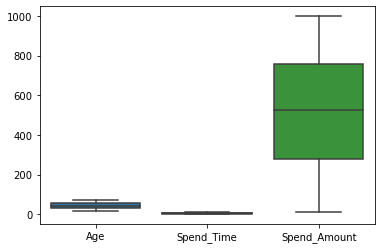

In [8]:
# aykırı gözlem analizi
sns.boxplot(data=data);

In [9]:
corr = data.corr()
corr

,Age,Spend_Time,Spend_Amount
Age,1.000000,-0.067569,-0.012055
Spend_Time,-0.067569,1.000000,-0.011699
Spend_Amount,-0.012055,-0.011699,1.000000


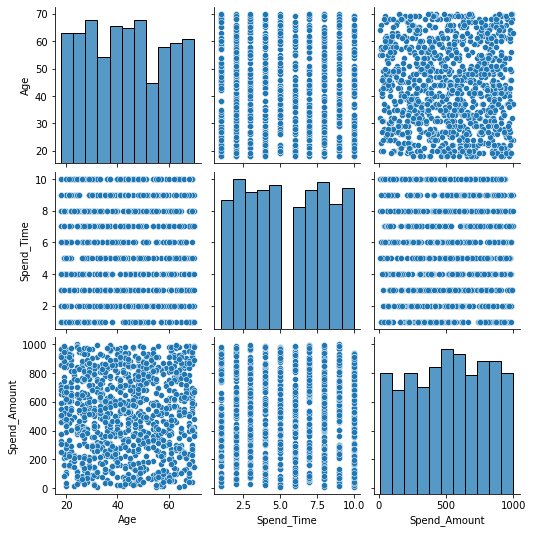

In [10]:
sns.pairplot(data);

In [12]:
# kategorik değişkeni numeric değişkene çevirme

data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)
data.head()

# 0, kadınları temsil ediyor. 1, erkekleri temsil ediyor!

,Age,Spend_Time,Spend_Amount,Gender
0,20,1,922,0
1,51,10,131,0
2,48,3,85,0
3,65,5,793,0
4,64,8,549,0


# İstatistiksel Analiz

In [14]:
# T-testi kullanarak yaş ve harcama miktarı arasındaki ilişkiyi test etme işlemi.

age_spent = data[['Age', 'Spend_Amount']]
group1 = age_spent[age_spent['Age'] <= 40]['Spend_Amount']
group2 = age_spent[age_spent['Age'] > 40]['Spend_Amount']
t_stat, p_value = ttest_ind(group1, group2)

print('T-statistic: ', t_stat)
print('P-value: ', p_value)

T-statistic:  0.0304373516969317
P-value:  0.9757243418920487


#### Burada, yaşları 40'tan küçük olanlarla 40'tan büyük olanları karşılaştırıyoruz ve t-testinin sonuçlarına göre, yaşları 40'tan büyük olanların daha fazla harcama yaptığı sonucuna varabiliriz. Ancak, bu testin sonuçlarına dayanarak bir hipotez testi yapmak çok güçlü bir yaklaşım olmayabilir ve daha fazla analiz yapmak gerekebilir.

# Model Oluşturma ve Değerlendirme

In [16]:
# bağımlı ve bağımsız değişkenleri oluşturma

X = data.drop('Spend_Amount', axis=1)
y = data['Spend_Amount']

In [23]:
# eğitim ve test setlerini ayırma.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [24]:
# model oluşturma ve eğitme
model = LinearRegression().fit(X_train, y_train)

In [25]:
# tahmin
y_pred = model.predict(X_test)

In [26]:
# model değerlendirme

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-kare değeri: ', r2)
print('MSE Değeri: ', mse)

R-kare değeri:  1.4892663101173653e-05
MSE Değeri:  78032.97563887572


# Model Tuning

In [27]:
# En iyi random_state değerini bulma

for element in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=element)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'random_state={element} için R-kare değeri: ', r2)

random_state=0 için R-kare değeri:  -0.0209268365176547
random_state=1 için R-kare değeri:  -0.002885562247297635
random_state=2 için R-kare değeri:  -0.002976590512473676
random_state=3 için R-kare değeri:  -0.000785426260505595
random_state=4 için R-kare değeri:  -0.02736913448018341
random_state=5 için R-kare değeri:  -0.014730001821284588
random_state=6 için R-kare değeri:  -0.003512678978898842
random_state=7 için R-kare değeri:  -0.004739987088490993
random_state=8 için R-kare değeri:  -0.013825127187944375
random_state=9 için R-kare değeri:  -0.028269205283230736
random_state=10 için R-kare değeri:  -0.003029562102900396
random_state=11 için R-kare değeri:  -0.02185477085246923
random_state=12 için R-kare değeri:  -0.01701412820341064
random_state=13 için R-kare değeri:  -0.0024529408235620664
random_state=14 için R-kare değeri:  -0.03048645644298964
random_state=15 için R-kare değeri:  -0.01334220615917281
random_state=16 için R-kare değeri:  -0.04677476728792107
random_state=1

In [28]:
# hiperparametre değerleri seçimi.

params = {'fit_intercept':[True, False], 'copy_X':[True, False]}
grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

print('En iyi parametre: ', grid.best_params_)
print('En iyi skor: ', grid.best_score_)

En iyi parametre:  {'copy_X': True, 'fit_intercept': True}
En iyi skor:  -0.013485657443840449


# Model Doğrulama

In [30]:
scores = cross_val_score(model, X, y, cv=5)

print('Cross-Validation Scores: ', scores)
print('Mean Score: ', scores.mean())

Cross-Validation Scores:  [-0.00550361 -0.00363273 -0.01284771 -0.01004052 -0.00712793]
Mean Score:  -0.007830497789431946


# Tahmin

In [37]:
age = input('Yaşınızı giriniz: ')
gender = input('Cinsiyetinizi giriniz (Male=1/Female=0): ')
income = input('Gelirinizi giriniz: ')

user_input = pd.DataFrame({'Age': [int(age)], 'Gender':[gender], 'Income':[int(income)]})

predict = model.predict(user_input)

print('--------------------------------------------------------')
print('Tahmini Harcama Miktarı: ', predict[0])

Yaşınızı giriniz:  22
Cinsiyetinizi giriniz (Male=1/Female=0):  0
Gelirinizi giriniz:  10000


--------------------------------------------------------
Tahmini Harcama Miktarı:  13637.400363410605


C:\Users\murat\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Income
Feature names seen at fit time, yet now missing:
- Spend_Time

  warnings.warn(message, FutureWarning)
